In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy.cluster import hierarchy
from sklearn.cluster import KMeans , DBSCAN
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import AgglomerativeClustering
import numpy as np
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (10,5)
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data',index_col=0)

In [4]:
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [5]:
df.rename(columns={'Award?':'Award'},inplace=True)

In [6]:
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


# Check for null and duplicates

In [7]:
df.isna().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [9]:
df[df.duplicated(keep=False)]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID#,,,,,,,,,,,
3393,1000,0,1,1,1,0,0,0,0,1597,0
3899,1000,0,1,1,1,0,0,0,0,1597,0


In [10]:
df.drop(index=3393,inplace=True)

In [11]:
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


# Visualization

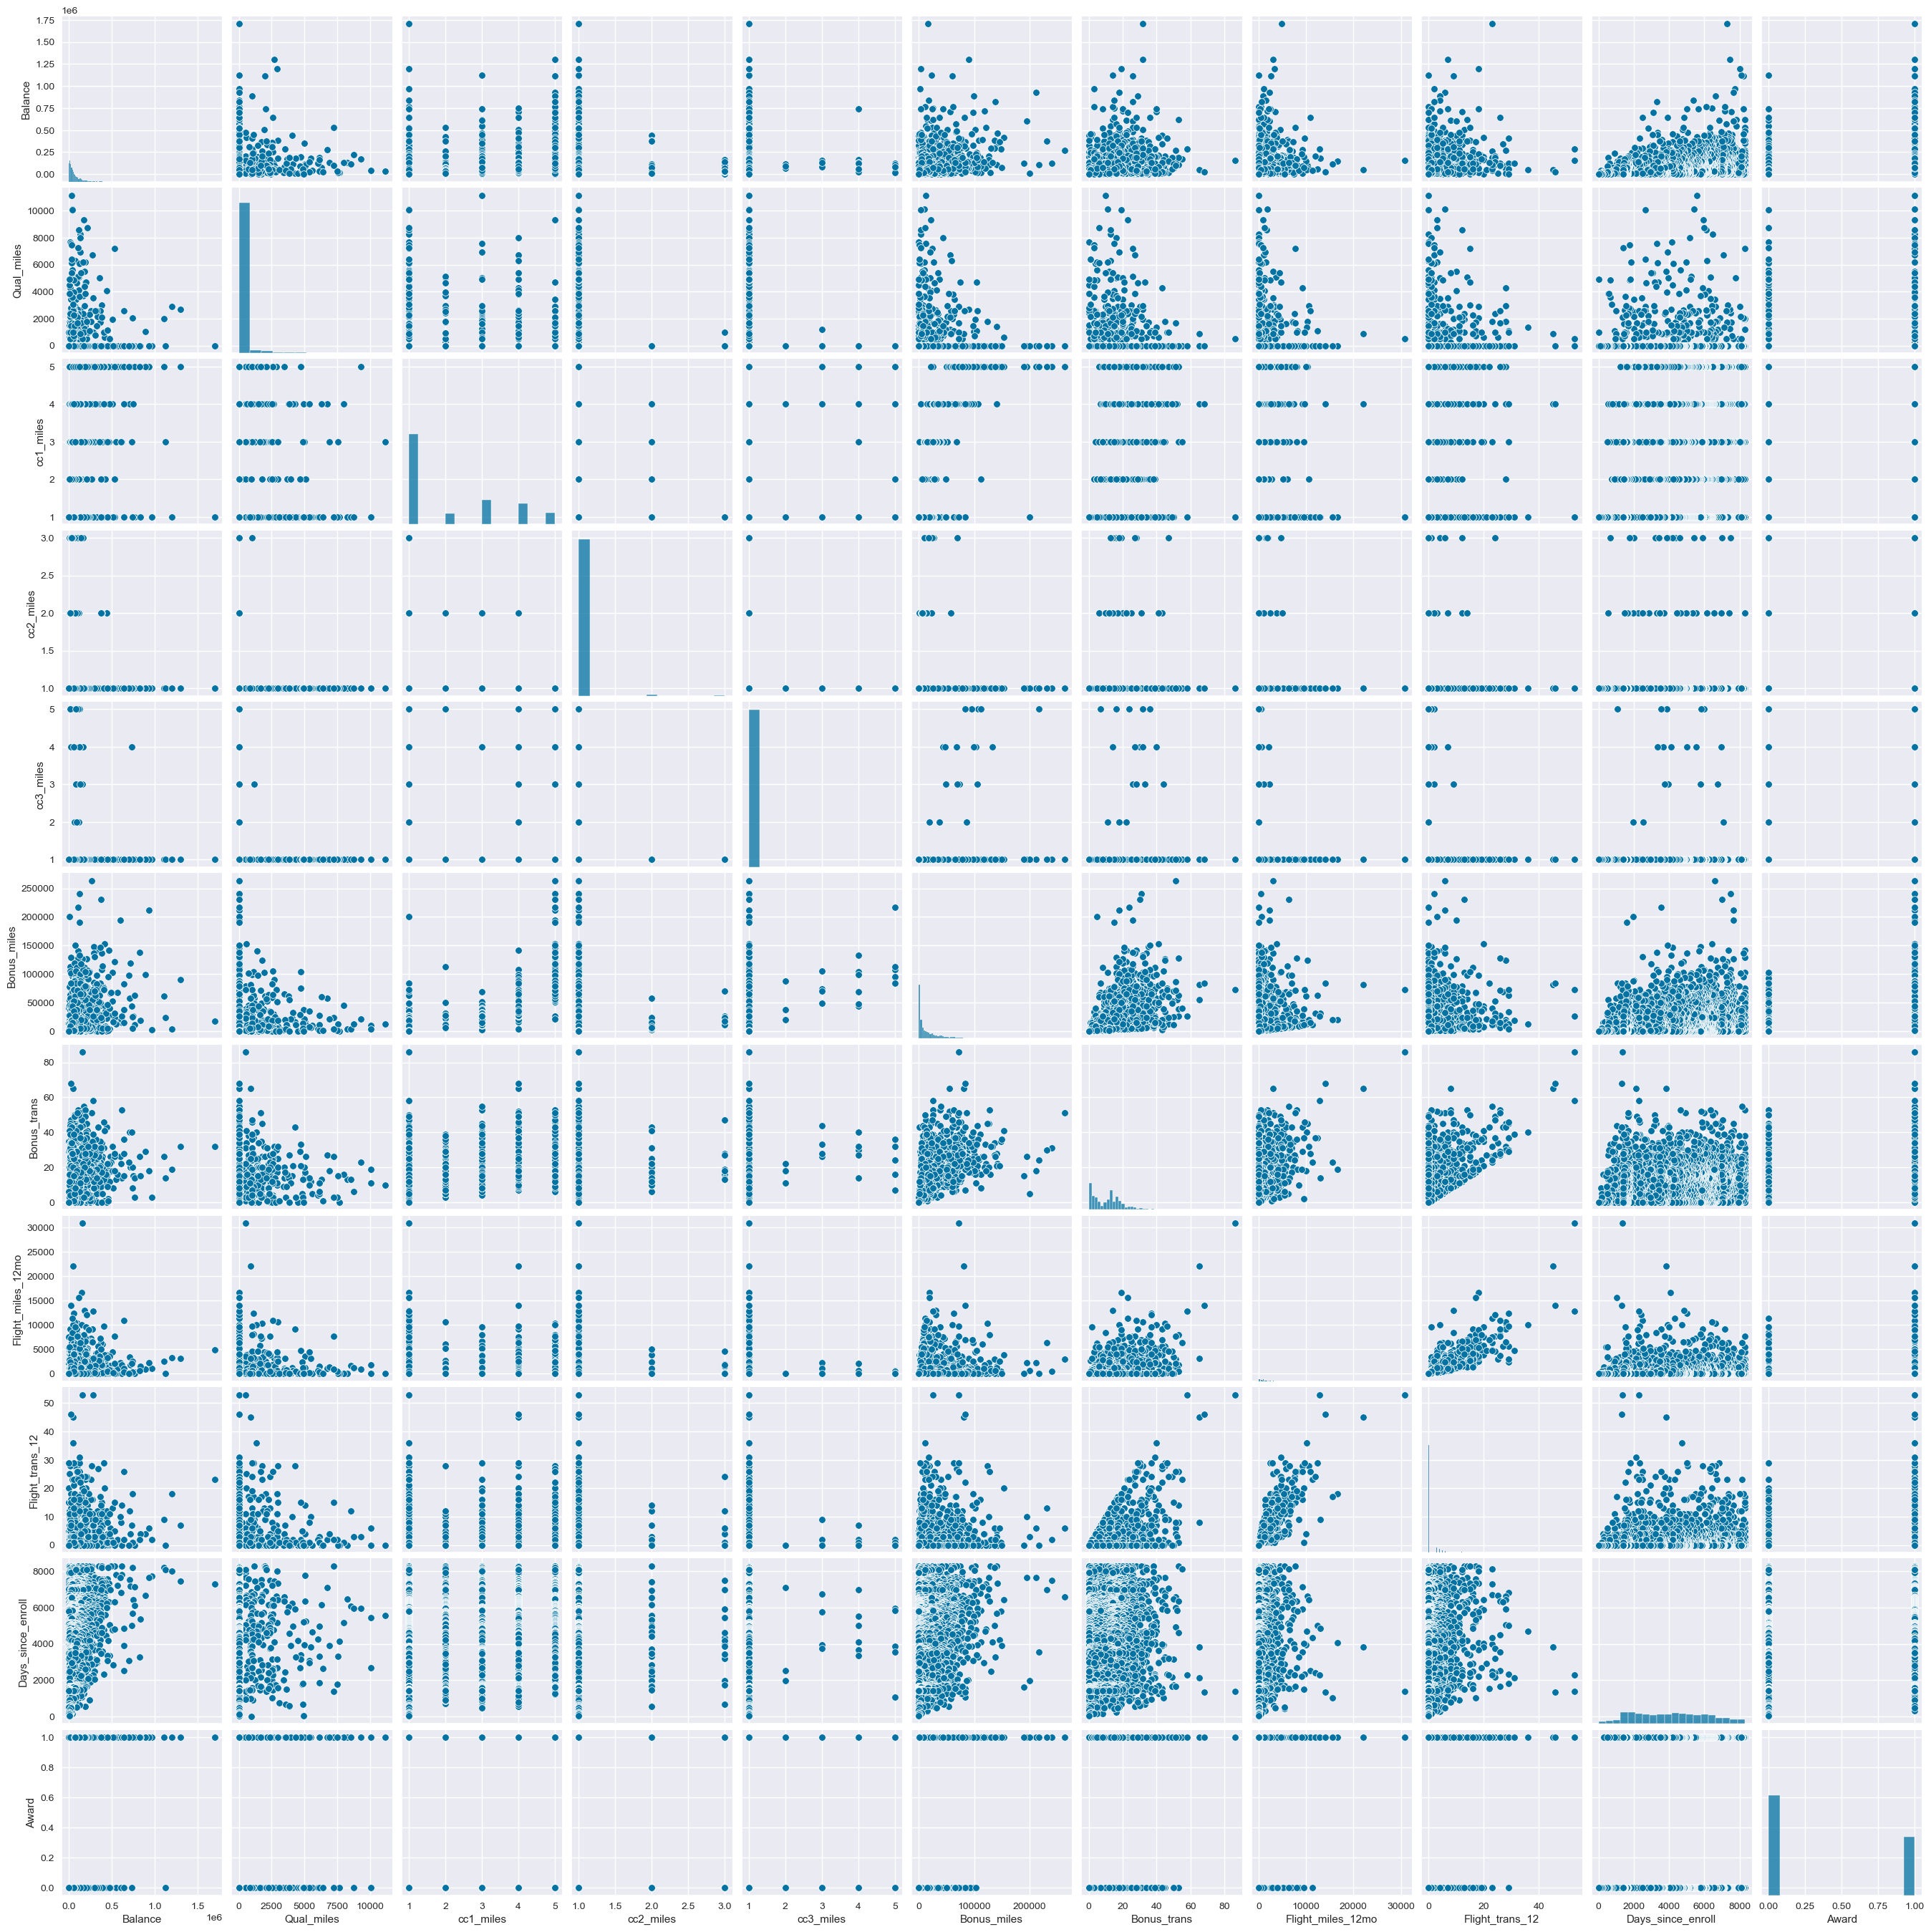

In [12]:
sns.pairplot(df)

# Data preprocessing
## Standardization

In [13]:
sc = StandardScaler()
scaled=sc.fit_transform(df)
scaled

array([[-4.51293870e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.39523468e+00, -7.67071631e-01],
       [-5.39604653e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.37973643e+00, -7.67071631e-01],
       [-3.20192202e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.41170157e+00, -7.67071631e-01],
       ...,
       [-2.23153612e-04, -1.86322793e-01,  6.82893866e-01, ...,
        -3.62219103e-01, -1.31599028e+00,  1.30365921e+00],
       [-1.85776026e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -9.85832074e-02, -1.31647460e+00, -7.67071631e-01],
       [-7.00646048e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01, -1.31792757e+00, -7.67071631e-01]])

# hierarical clustering

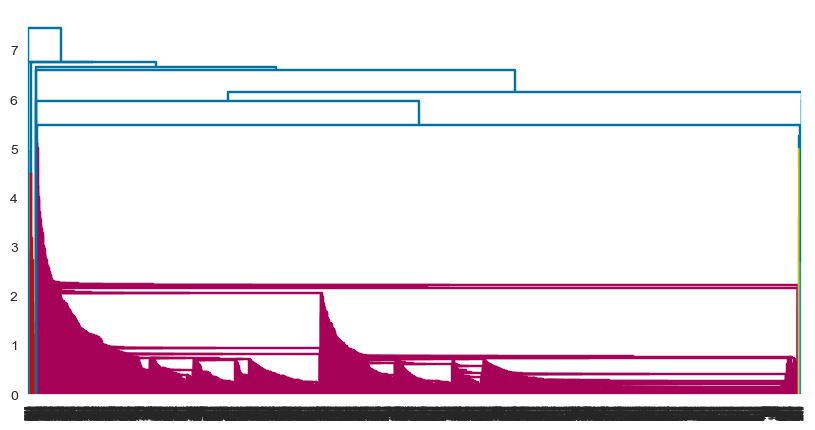

In [57]:
lk = hierarchy.linkage(scaled, method='single')
dend = hierarchy.dendrogram(lk)
plt.show()

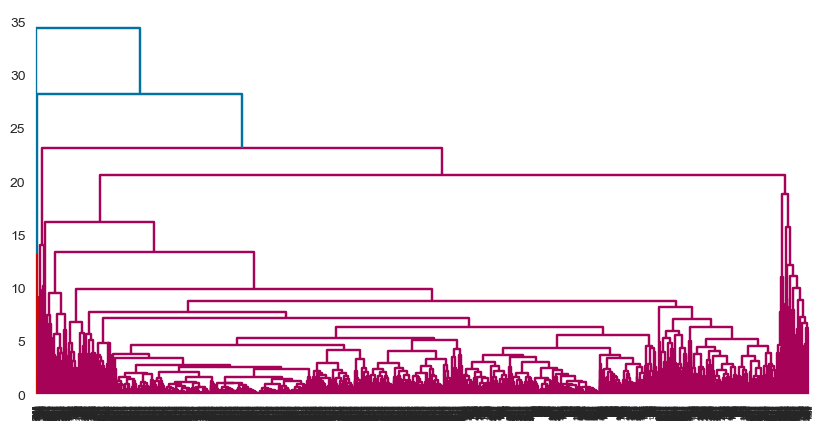

In [58]:
lk_c = hierarchy.linkage(scaled, method='complete')
dend = hierarchy.dendrogram(lk_c)
plt.show()

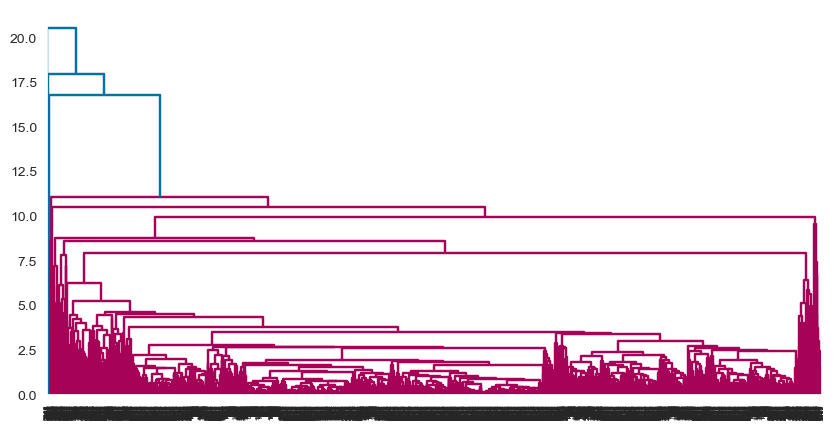

In [59]:
lk_a= hierarchy.linkage(scaled, method='average')
dend = hierarchy.dendrogram(lk_a)
plt.show()

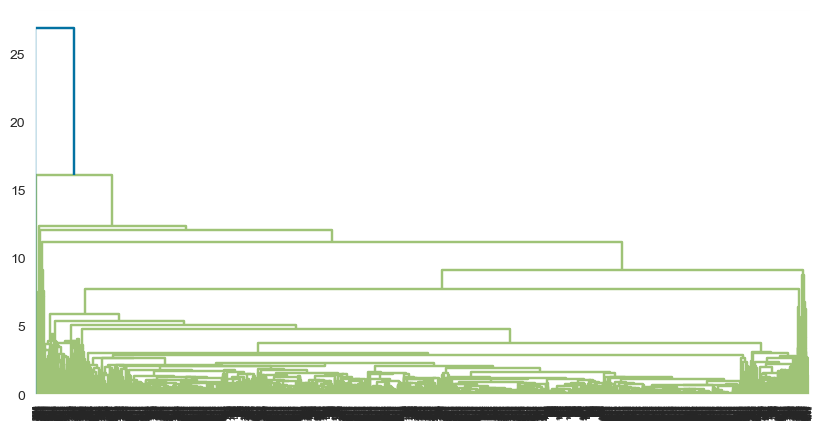

In [60]:
lk_ct = hierarchy.linkage(scaled, method='centroid')
dend = hierarchy.dendrogram(lk_ct)
plt.show()

#  model

In [18]:
hc = AgglomerativeClustering()
y = hc.fit_predict(scaled)

In [19]:
df['cluster_h']=y
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster_h
ID#,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1
2,19244,0,1,1,1,215,2,0,0,6968,0,1
3,41354,0,1,1,1,4123,4,0,0,7034,0,1
4,14776,0,1,1,1,500,1,0,0,6952,0,1
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
4018,64385,0,1,1,1,981,5,0,0,1395,1,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1,0


In [20]:
df.groupby('cluster_h').agg('mean')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
cluster_h,,,,,,,,,,,
0,117912.886093,366.377483,3.406623,1.000000,1.03245,37101.439735,19.037086,853.826490,2.483444,4688.513245,0.670861
1,46737.239148,9.278135,1.242363,1.023312,1.00000,5039.817524,7.094051,221.256029,0.700563,3773.660370,0.188103


# Visualization

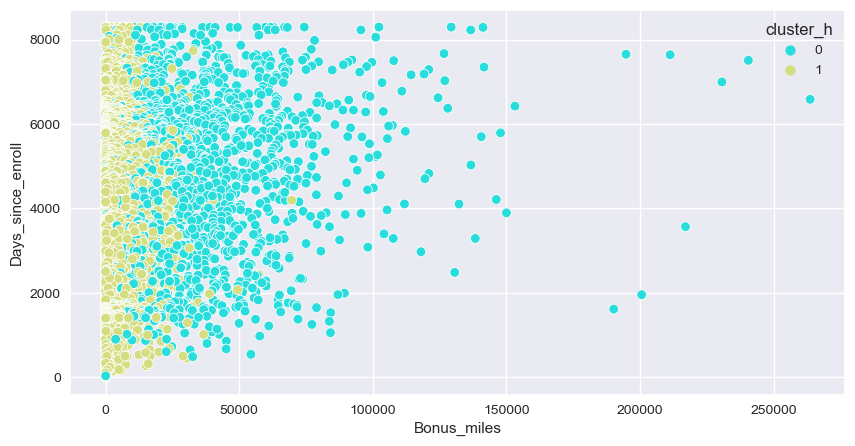

In [61]:
sns.scatterplot(x=df['Bonus_miles'],y=df['Days_since_enroll'],hue= df['cluster_h'],palette='rainbow')
plt.show()

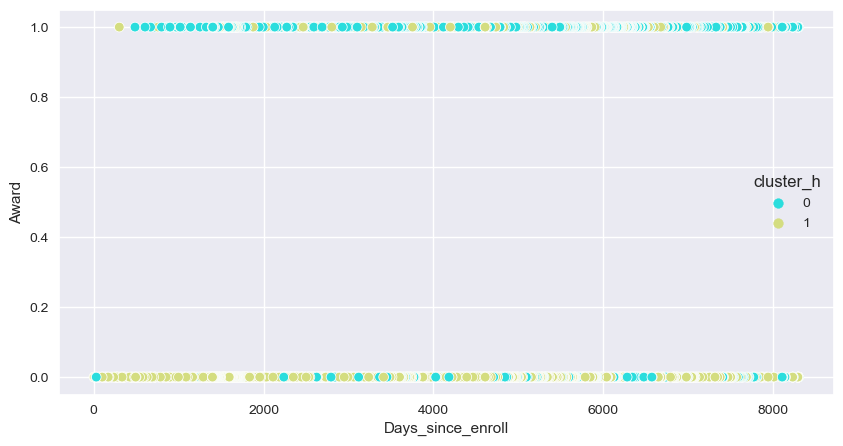

In [62]:
sns.scatterplot(x=df['Days_since_enroll'],y=df['Award'],hue= df['cluster_h'],palette='rainbow')
plt.show()

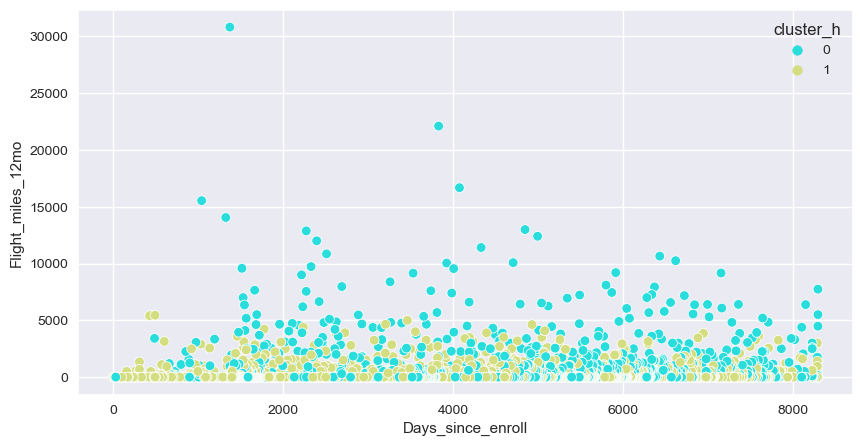

In [63]:
sns.scatterplot(x=df['Days_since_enroll'],y=df['Flight_miles_12mo'],hue= df['cluster_h'],palette='rainbow')
plt.show()

In [24]:
silhouette_score(scaled,y)

0.28915604880621426

# K-Means

In [25]:
km = KMeans()
y = km.fit_predict(scaled)

In [26]:
km.cluster_centers_

array([[-0.38403382, -0.1441216 , -0.58031331, -0.09825429, -0.06277446,
        -0.52435826, -0.51185071, -0.22901639, -0.25089099, -0.98088498,
        -0.76707163],
       [-0.15842649, -0.06252922, -0.26329522, -0.09825429, -0.06277446,
        -0.27144706, -0.10704783, -0.03494801, -0.03480033,  0.06921441,
         1.30365921],
       [ 1.172946  ,  0.50502983,  0.20232602, -0.09825429, -0.06277446,
         0.74050148,  1.80299815,  3.88034955,  4.17905786,  0.24660175,
         0.86771588],
       [ 0.64367909, -0.10628043,  1.55535493, -0.09825429, -0.05028206,
         1.36999722,  0.86834317, -0.05584179, -0.05710878,  0.40579019,
         0.53849891],
       [ 0.63950059, -0.08446932,  1.02183982, -0.09825429, 15.64433492,
         3.1793166 ,  1.7144102 ,  0.0332068 ,  0.05959833,  0.2395819 ,
         0.33731815],
       [-0.04706705, -0.15626333, -0.66838569,  9.03710982, -0.06277446,
        -0.1018366 ,  0.61758448,  0.08745745,  0.22023229, -0.0727739 ,
         0.051

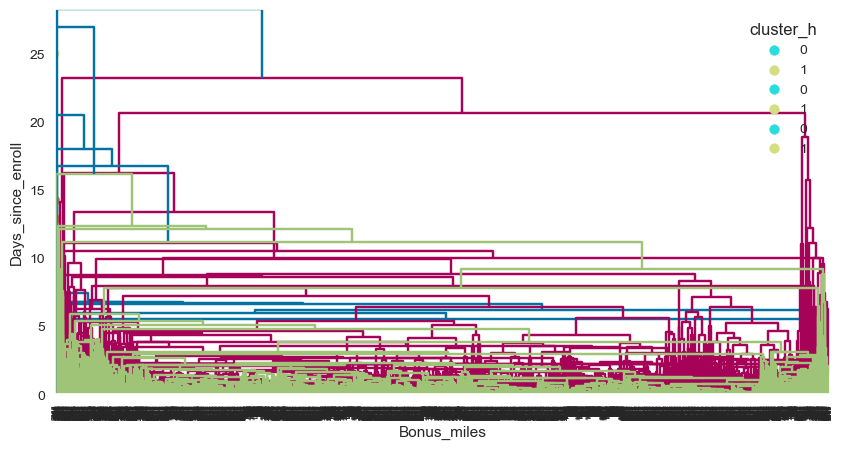

In [27]:
plt.scatter(x=scaled[:,0],y=scaled[:,1],c=y,cmap='rainbow')
plt.show()

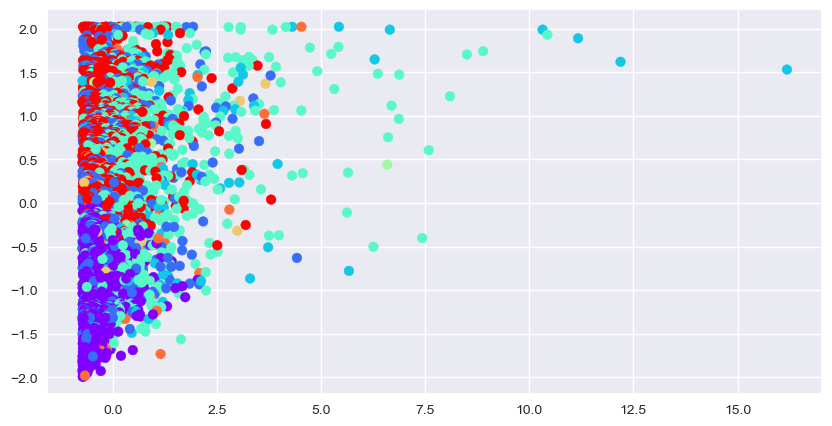

In [28]:
plt.scatter(x=scaled[:,0],y=scaled[:,-2],c=y,cmap='rainbow')
plt.show()

In [29]:
silhouette_score(scaled,y)

0.23710448753887042

# Elbow Graph

In [30]:
wcss=[]
for i in range(2,20):
    km = KMeans(n_clusters=i)
    km.fit_predict(scaled)
    wcss.append(km.inertia_)

In [31]:
plt.plot(range(2,20),wcss)
plt.title('Elbow Graph')
plt.axvline(8,linestyle='--',c='r')

# Kmeans Final

In [32]:
finalkmean= KMeans(n_clusters=8)
ypred = finalkmean.fit_predict(scaled)

In [33]:
silhouette_score(scaled,ypred)

0.2364505342177449

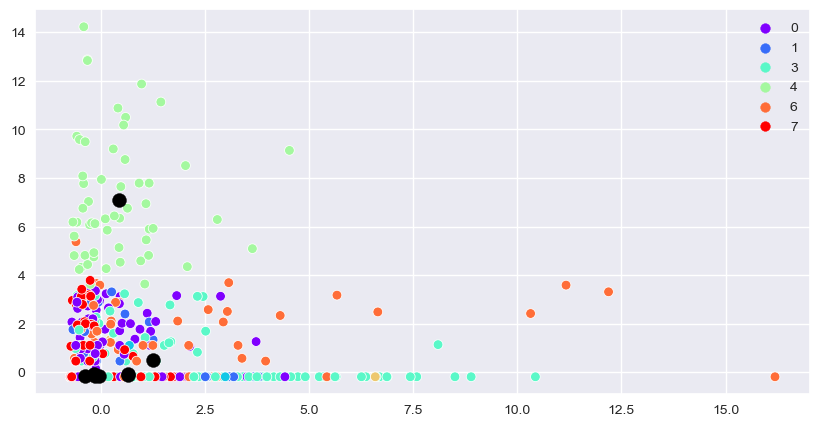

In [64]:
sns.scatterplot(x=scaled[:,0],y=scaled[:,1],hue=ypred,palette='rainbow')
plt.scatter(finalkmean.cluster_centers_[:,0],finalkmean.cluster_centers_[:,1],color = 'black',s=100)
plt.show()

# Evaluate

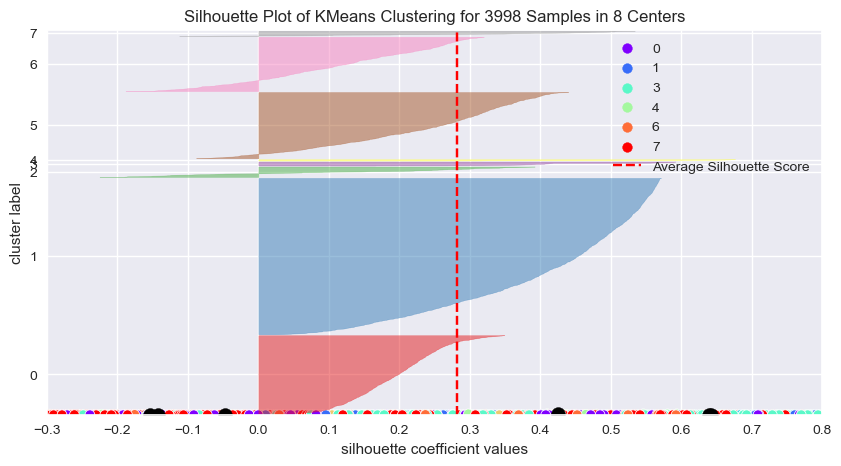

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 3998 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [35]:
model = SilhouetteVisualizer(KMeans(n_clusters=8))
vis = model.fit(scaled)
vis.show()

In [36]:
df['clusterkm']=ypred
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster_h,clusterkm
ID#,,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1,1
2,19244,0,1,1,1,215,2,0,0,6968,0,1,1
3,41354,0,1,1,1,4123,4,0,0,7034,0,1,1
4,14776,0,1,1,1,500,1,0,0,6952,0,1,1
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,3


In [37]:
df.groupby('clusterkm').agg('mean')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster_h
clusterkm,,,,,,,,,,,,
0,58169.349383,98.964198,1.695062,1.000000,1.000000,10584.520988,10.607407,421.613580,1.295062,4254.603704,1.000000,0.551852
1,59307.459184,32.569388,1.496939,1.000000,1.001020,6235.202041,8.433673,174.996939,0.529592,5626.838776,0.000000,0.885714
2,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349,1.000000
3,138370.597561,61.925610,4.201220,1.000000,1.002439,50224.776829,19.959756,388.939024,1.180488,4957.047561,0.630488,0.000000
4,116472.400000,5636.345455,2.072727,1.000000,1.000000,19804.290909,12.545455,963.036364,2.890909,3950.636364,0.527273,0.000000
5,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333,0.000000
6,199014.459016,520.221311,2.385246,1.000000,1.000000,36582.278689,29.844262,6137.696721,17.696721,4762.639344,0.819672,0.032787
7,34614.029488,32.790980,1.252385,1.000000,1.000000,4424.204683,6.648742,150.398959,0.450997,2085.874241,0.000000,0.976583


# DBSCAN

In [38]:
db = DBSCAN(eps=0.5,min_samples=5)
y= db.fit_predict(scaled)

In [39]:
y

array([ 0,  0,  0, ..., -1,  0,  0], dtype=int64)

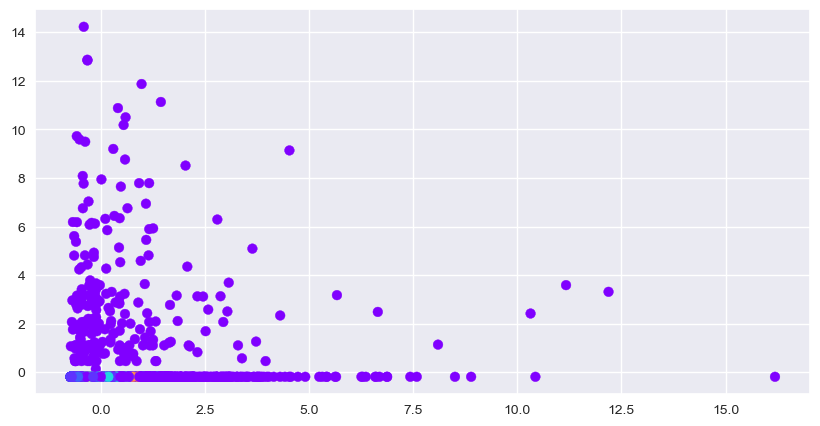

In [40]:
plt.scatter(x=scaled[:,0],y=scaled[:,1],c=y,cmap='rainbow')
plt.show()

In [41]:
silhouette_score(scaled,y)

-0.07847654973330041

# Hyperparameter Tuning

In [42]:
neigh = NearestNeighbors(n_neighbors=3).fit(scaled)
d,i=neigh.kneighbors(scaled)

In [43]:
d

array([[0.        , 0.11185195, 0.12033566],
       [0.        , 0.11406716, 0.11438169],
       [0.        , 0.16540105, 0.19458411],
       ...,
       [0.        , 0.16614444, 0.28024134],
       [0.        , 0.25725538, 0.27165991],
       [0.        , 0.00270567, 0.01129616]])

In [44]:
dist =np.sort(d[:,1])

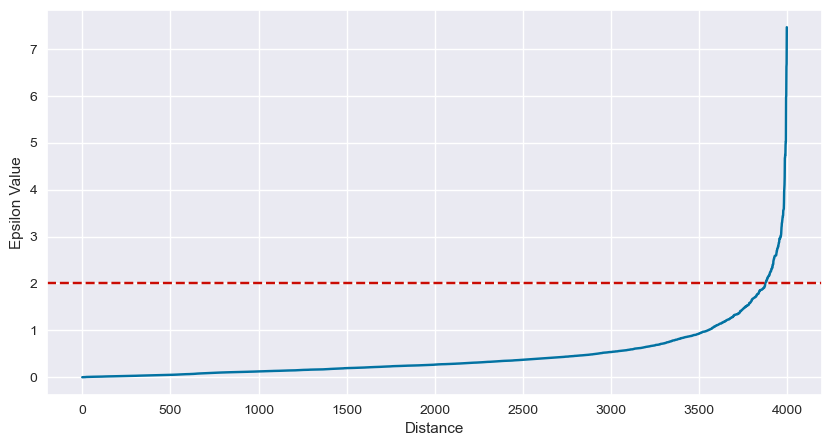

In [45]:
plt.plot(dist)
plt.xlabel('Distance')
plt.ylabel('Epsilon Value')
plt.axhline(2,linestyle='--',c='r')

plt.show()

Epsilon value = 2

In [46]:
dbs = DBSCAN(eps=2, min_samples=12)
ypre = dbs.fit_predict(scaled)
ypre

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [47]:
silhouette_score(scaled,ypre)

0.25532735902092807

In [48]:
dbs = DBSCAN(eps=2, min_samples=18)
ypre = dbs.fit_predict(scaled)
ypre

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [49]:
silhouette_score(scaled,ypre)

0.2522827425697712

# Final DBSCAN

In [50]:
dbs = DBSCAN(eps=2, min_samples=12)
ypre = dbs.fit_predict(scaled)
ypre

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [51]:
silhouette_score(scaled,ypre)

0.25532735902092807

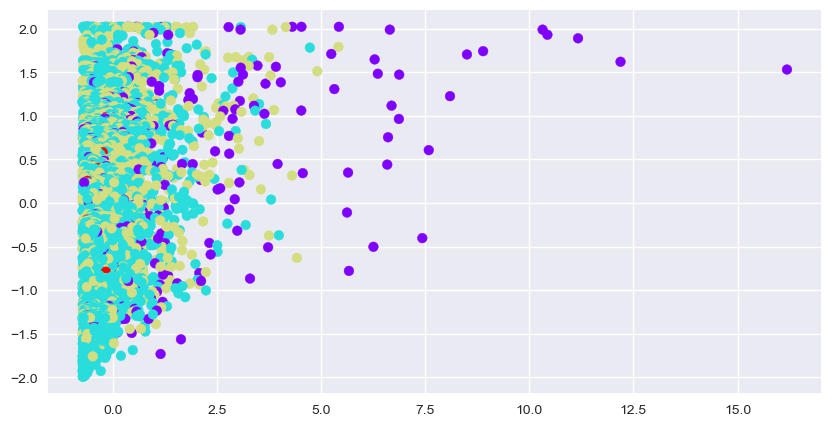

In [52]:
plt.scatter(x=scaled[:,0], y=scaled[:,-2],c=ypre,cmap='rainbow')
plt.show()

In [53]:
df['cluster_db']=ypre
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster_h,clusterkm,cluster_db
ID#,,,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1,1,0
2,19244,0,1,1,1,215,2,0,0,6968,0,1,1,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,1,1,0
4,14776,0,1,1,1,500,1,0,0,6952,0,1,1,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,1,0,1
4018,64385,0,1,1,1,981,5,0,0,1395,1,1,0,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,0,1


# cluster Insight

## For hierarchical

In [54]:
df.groupby('cluster_h')[['Balance','Qual_miles','cc1_miles','cc2_miles','cc3_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll','Award']].agg('mean')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
cluster_h,,,,,,,,,,,
0,117912.886093,366.377483,3.406623,1.000000,1.03245,37101.439735,19.037086,853.826490,2.483444,4688.513245,0.670861
1,46737.239148,9.278135,1.242363,1.023312,1.00000,5039.817524,7.094051,221.256029,0.700563,3773.660370,0.188103


## For kmean


In [55]:
df.groupby('clusterkm')[['Balance','Qual_miles','cc1_miles','cc2_miles','cc3_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll','Award']].agg('mean')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
clusterkm,,,,,,,,,,,
0,58169.349383,98.964198,1.695062,1.000000,1.000000,10584.520988,10.607407,421.613580,1.295062,4254.603704,1.000000
1,59307.459184,32.569388,1.496939,1.000000,1.001020,6235.202041,8.433673,174.996939,0.529592,5626.838776,0.000000
2,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
3,138370.597561,61.925610,4.201220,1.000000,1.002439,50224.776829,19.959756,388.939024,1.180488,4957.047561,0.630488
4,116472.400000,5636.345455,2.072727,1.000000,1.000000,19804.290909,12.545455,963.036364,2.890909,3950.636364,0.527273
5,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
6,199014.459016,520.221311,2.385246,1.000000,1.000000,36582.278689,29.844262,6137.696721,17.696721,4762.639344,0.819672
7,34614.029488,32.790980,1.252385,1.000000,1.000000,4424.204683,6.648742,150.398959,0.450997,2085.874241,0.000000


## For DBscan

In [56]:
df.groupby('cluster_db')[['Balance','Qual_miles','cc1_miles','cc2_miles','cc3_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll','Award']].agg('mean')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
cluster_db,,,,,,,,,,,
-1,225834.029167,1490.650000,2.675000,1.175,1.204167,47893.308333,25.491667,3325.745833,9.670833,4841.904167,0.745833
0,57663.177049,42.624180,1.695902,1.000,1.000000,9778.901639,8.890164,187.600820,0.547951,3813.595082,0.000000
1,75887.015361,87.983871,2.641321,1.000,1.000000,25391.933948,14.109063,445.843318,1.399386,4566.139785,1.000000
2,39218.500000,0.000000,1.000000,2.000,1.000000,9189.250000,13.500000,209.375000,0.812500,3511.187500,0.000000
